In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [3]:
df=pd.read_csv('../input/BreadBasket_DMS.csv')
month_col=df['Date'].values
month_col= [ my_str.split("-")[1] for my_str in month_col ]
df['Month']=month_col

month_col=df['Date'].values
month_col= [ my_str.split("-")[0] for my_str in month_col ]
df['Year']=month_col

month_col=df['Date'].values
month_col= [ my_str.split("-")[2] for my_str in month_col ]
df['Day']=month_col

month_col=df['Date'].values
month_col= [ datetime.date(int(my_str.split("-")[0]),int( my_str.split("-")[1]), int(my_str.split("-")[-1])).weekday() for my_str in month_col ]
df['Weekday']=month_col

df['Hours']= df['Time'].str.split(':',n=1,expand=True)[0]
df.dropna(inplace=True)


In [4]:
df.groupby(['Item']).groups.keys()

dict_keys(['Adjustment', 'Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread', 'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake', 'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew', 'Chicken sand', 'Chimichurri Oil', 'Chocolates', 'Christmas common', 'Coffee', 'Coffee granules ', 'Coke', 'Cookies', 'Crepes', 'Crisps', 'Drinking chocolate spoons ', 'Duck egg', 'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches", 'Empanadas', 'Extra Salami or Feta', 'Fairy Doors', 'Farm House', 'Focaccia', 'Frittata', 'Fudge', 'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack', 'Half slice Monster ', 'Hearty & Seasonal', 'Honey', 'Hot chocolate', 'Jam', 'Jammie Dodgers', 'Juice', 'Keeping It Local', 'Kids biscuit', 'Lemon and coconut', 'Medialuna', 'Mighty Protein', 'Mineral water', 'Mortimer', 'Muesli', 'Muffin', 'My-5 Fruit Shoot', 'NONE', 'Nomad bag', 'Olum & polenta', 'Pana

In [5]:
df=df[df['Item']!='NONE']

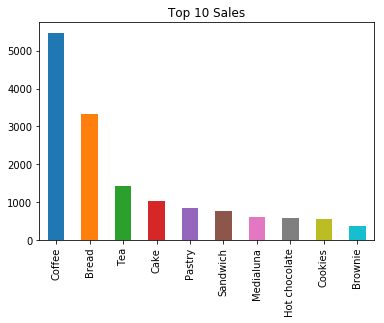

In [6]:
df['Item'].value_counts()
df['Item'].value_counts()[:10].plot.bar(title='Top 10 Sales')

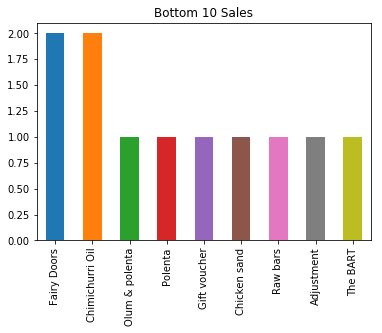

In [7]:
df['Item'].value_counts()[-10:-1].plot.bar(title='Bottom 10 Sales')

C:\Users\Advait\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


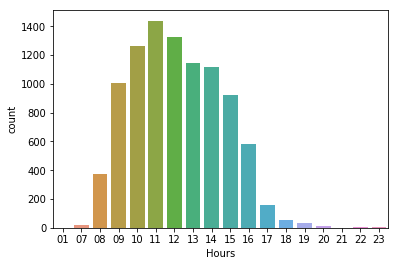

In [8]:
df1=df[['Transaction', 'Month', 'Year', 'Day','Weekday','Hours']]
df1.drop_duplicates(inplace=True)
sns.countplot(x='Hours',data=df1)

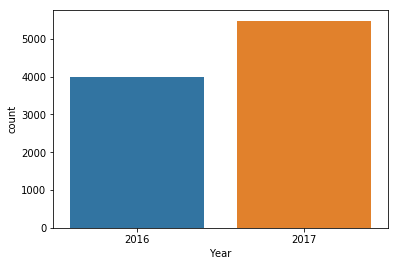

In [9]:
sns.countplot(x='Year',data=df1)

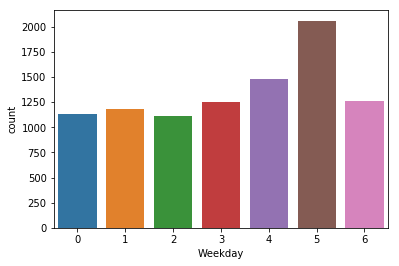

In [10]:
sns.countplot(x='Weekday',data=df1)

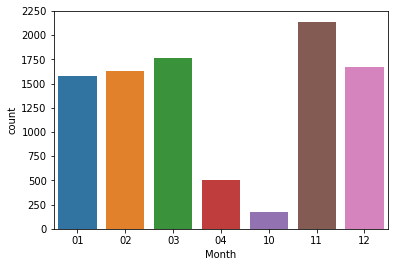

In [11]:
sns.countplot(x='Month',data=df1)

In [14]:
 df.groupby(['Item']).groups.keys()

dict_keys(['Adjustment', 'Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread', 'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake', 'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew', 'Chicken sand', 'Chimichurri Oil', 'Chocolates', 'Christmas common', 'Coffee', 'Coffee granules ', 'Coke', 'Cookies', 'Crepes', 'Crisps', 'Drinking chocolate spoons ', 'Duck egg', 'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches", 'Empanadas', 'Extra Salami or Feta', 'Fairy Doors', 'Farm House', 'Focaccia', 'Frittata', 'Fudge', 'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack', 'Half slice Monster ', 'Hearty & Seasonal', 'Honey', 'Hot chocolate', 'Jam', 'Jammie Dodgers', 'Juice', 'Keeping It Local', 'Kids biscuit', 'Lemon and coconut', 'Medialuna', 'Mighty Protein', 'Mineral water', 'Mortimer', 'Muesli', 'Muffin', 'My-5 Fruit Shoot', 'Nomad bag', 'Olum & polenta', 'Panatone', '

In [30]:
df2=df.groupby(['Item'])['Transaction'].apply(list)

In [31]:
df3=df.groupby(['Transaction']).count()

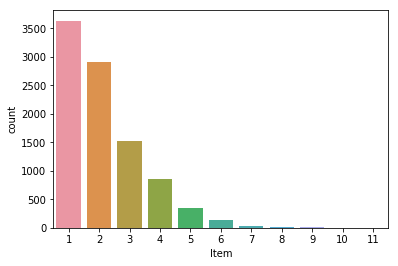

In [19]:
sns.countplot(x='Item',data=df3)

In [23]:
lst1=list(set(df3[df3['Item']>1].index) & set(df[df['Item']=='Coffee']['Transaction']))
df5=pd.DataFrame()
for i in lst1:
    df5=df5.append(df[i==df['Transaction']])

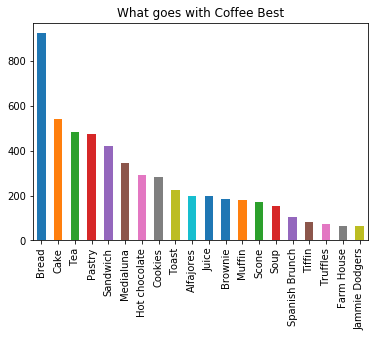

In [29]:
df5[df5['Item']!='Coffee']['Item'].value_counts()[:20].plot.bar(title="What goes with Coffee Best")

C:\Users\Advait\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


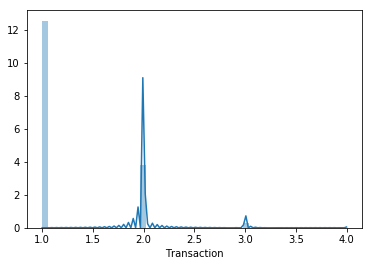

In [32]:
sns.distplot(df5[df5['Item']=='Coffee']['Transaction'].value_counts())